## Import dos dados

In [201]:
import string
from pathlib import Path
from collections import Counter
import math
import re
import pandas as pd
import numpy as np

In [2]:
datasets_dir = Path().absolute().parent.joinpath('datasets')
reviews = f"{datasets_dir}/fakenews.csv"

In [3]:
df = pd.read_csv(reviews)
df.head()

,index,label,preprocessed_news
0,0,fake,katia abreu diz vai colocar expulsao moldura n...
1,1,fake,ray peita bolsonaro conservador fake entrevist...
2,2,fake,reinaldo azevedo desmascarado policia federal ...
3,3,fake,relatorio assustador bndes mostra dinheiro pub...
4,4,fake,radialista americano fala sobre pt vendem ilus...


In [4]:
df.groupby('label').count()

,index,preprocessed_news
label,,
TRUE,3600,3600
fake,3600,3600


In [5]:
fake_sentences = 3600
true_sentences = 3600

## Tratamento do texto e treinamento

In [6]:
stopwords = ['de', 'a', 'o', 'que', 'e', 'do', 'da', 'em', 'um', 'para', 'é', 'com', 'não', 'uma', 'os', 'no', 'se', 'na', 'por', 'mais', 'as', 'dos', 'como', 'mas', 'foi', 'ao', 'ele', 'das', 'tem', 'à', 'seu', 'sua', 'ou', 'ser', 'quando', 'muito', 
             'há', 'nos', 'já', 'está', 'eu', 'também', 'só', 'pelo', 'pela', 'até', 'isso', 'ela', 'entre', 'era', 'depois', 'sem', 'mesmo', 'aos', 'ter', 'seus', 'quem', 'nas', 'me', 'esse', 'eles', 'estão', 'você', 'tinha', 'foram', 'essa', 'num', 
             'nem', 'suas', 'meu', 'às', 'minha', 'têm', 'numa', 'pelos', 'elas', 'havia', 'seja', 'qual', 'será', 'nós', 'tenho', 'lhe', 'deles', 'essas', 'esses', 'pelas', 'este', 'fosse', 'dele', 'tu', 'te', 'vocês', 'vos', 'lhes', 'meus', 'minhas' 
             'teu', 'tua', 'teus', 'tuas', 'nosso', 'nossa', 'nossos', 'nossas', 'dela', 'delas', 'esta', 'estes', 'estas', 'aquele', 'aquela', 'aqueles', 'aquelas', 'isto', 'aquilo', 'estou', 'está', 'estamos', 'estão', 'estive', 'esteve', 'estivemos', 
             'estiveram', 'estava', 'estávamos', 'estavam', 'estivera', 'estivéramos', 'esteja', 'estejamos', 'estejam', 'estivesse', 'estivéssemos', 'estivessem', 'estiver', 'estivermos', 'estiverem', 'hei', 'há', 'havemos', 'hão', 'houve', 'houvemos', 
             'houveram', 'houvera', 'houvéramos', 'haja', 'hajamos', 'hajam', 'houvesse', 'houvéssemos', 'houvessem', 'houver', 'houvermos', 'houverem', 'houverei', 'houverá', 'houveremos', 'houverão', 'houveria', 'houveríamos', 'houveriam', 'sou', 
             'somos', 'são', 'era', 'éramos', 'eram', 'fui', 'foi', 'fomos', 'foram', 'fora', 'fôramos', 'seja', 'sejamos', 'sejam', 'fosse', 'fôssemos', 'fossem', 'for', 'formos', 'forem', 'serei', 'será', 'seremos', 'serão', 'seria', 'seríamos', 
             'seriam', 'tenho', 'tem', 'temos', 'tém', 'tinha', 'tínhamos', 'tinham', 'tive', 'teve', 'tivemos', 'tiveram', 'tivera', 'tivéramos', 'tenha', 'tenhamos', 'tenham', 'tivesse', 'tivéssemos', 'tivessem', 'tiver', 'tivermos', 'tiverem', 
             'terei', 'terá', 'teremos', 'terão', 'teria', 'teríamos', 'teriam', '.', ',']

true_rev = []
fake_rev = []

In [7]:
del df['index']

In [8]:
for index, row in df.iterrows():
    if(row['label'] == 'fake'):
        fake_rev.append(row['preprocessed_news'])
    elif (row['label'] == 'TRUE'):
        true_rev.append(row['preprocessed_news'])

In [9]:
len(true_rev)

3600

In [10]:
#Separando para testes
training_fake_news = fake_rev[:2700]
training_true_news = true_rev[:2700]
training_news = training_fake_news + training_true_news
testing_fake_news = fake_rev[2701:]
testing_true_news = true_rev[2701:]
testing_news = testing_fake_news + testing_true_news

In [11]:
len(testing_fake_news)

899

In [12]:
def remove_stopword(dictionary):
    #delete = [key for key in dictionary if key in stopwords]
    #for key in delete: del dictionary[key]
    return dictionary     

In [13]:
def format_text(array):
    normalized = [str.lower(sentence) for sentence in array]
    split = [re.findall(r"[\w']+|[,.!?;]", item) for item in normalized]
    flat_split = []
    for lists in split:
        for words in lists:
            flat_split.append(words)
    return flat_split

In [14]:
def format_text_count(array):
    normalized = [str.lower(sentence) for sentence in array]
    split = [re.findall(r"[\w']+|[,.!?;]", item) for item in normalized]
    counter = [Counter(word) for word in split]
    summed = Counter({})
    for word in counter:
            summed += Counter(word)
    return summed   

In [15]:
fake_word_count = format_text_count(training_fake_news)
true_word_count = format_text_count(training_true_news)

In [16]:
fake_words = remove_stopword(fake_word_count)
true_words = remove_stopword(true_word_count)

Counter({'katia': 40,
         'abreu': 63,
         'diz': 540,
         'vai': 671,
         'colocar': 84,
         'expulsao': 9,
         'moldura': 2,
         'nao': 4467,
         'reclamar': 11,
         'senadora': 125,
         'disse': 1608,
         'pmdb': 194,
         'resultado': 52,
         'acao': 175,
         'cupula': 45,
         'atual': 108,
         'legenda': 12,
         'segundo': 292,
         'oportunista': 5,
         'amanha': 51,
         'vou': 140,
         'botar': 11,
         'dourada': 1,
         'porque': 403,
         'maos': 70,
         'onde': 324,
         'veio': 36,
         'atestado': 6,
         'boa': 63,
         'conduta': 15,
         'curriculo': 5,
         'pessoas': 456,
         'expulsaram': 2,
         'servem': 5,
         'pais': 897,
         'beneficios': 24,
         'proprios': 28,
         'ue': 4,
         'algo': 144,
         'tao': 133,
         'bom': 116,
         'tanta': 24,
         'choradeira': 1,
       

In [17]:
def cal_number_of(dictionary):
    numbers = 0
    for value in dictionary.values():
       numbers += value
    return numbers    

In [18]:
numb_of_fake_words = cal_number_of(fake_words)
numb_of_true_words = cal_number_of(true_words)
numb_of_words = numb_of_fake_words + numb_of_true_words

In [19]:
#print(fake_words)
#print(type(fake_words))

## Classificação

In [20]:
#log P(C)
prob_of_fake_math = math.log((fake_sentences) / (true_sentences+fake_sentences), 10)
prob_of_true_math = math.log((true_sentences) / (true_sentences+fake_sentences), 10)

In [21]:
print(prob_of_fake_math, prob_of_true_math)

-0.30102999566398114 -0.30102999566398114


In [22]:
#E log(P(Wi|c))
def calc_prob_of_word_in_context(word, context):
    if(context == 'fake'):
        probability = math.log((fake_words[word] + 1) / (numb_of_fake_words + numb_of_words), 10)
    elif(context =='TRUE'):
        probability = math.log((true_words[word] + 1) / (numb_of_true_words + numb_of_words), 10)
    return probability    

In [23]:
def ascertain_context(review):
    prob_of_fake = 0.0
    prob_of_true = 0.0
    prob_of_words_in_fake = 0.0
    prob_of_words_in_true = 0.0
    for words in review:
        prob_of_words_in_fake += (calc_prob_of_word_in_context(words, 'fake'))
        prob_of_words_in_true += (calc_prob_of_word_in_context(words, 'TRUE'))
    
    prob_of_fake = prob_of_fake_math + prob_of_words_in_fake
    prob_of_true = prob_of_true_math + prob_of_words_in_true
    
    if(prob_of_fake > prob_of_true):
        print(prob_of_fake, prob_of_true)
        return 'fake'
    elif(prob_of_fake < prob_of_true):
        print(prob_of_fake, prob_of_true)
        return 'TRUE'

In [24]:
class Classification():
    selected_number = input("Selecione um número de 0 a 1798: ")
    print("News escolhida: ", testing_news[int(selected_number)])
    split_selected_text = format_text([testing_news[int(selected_number)]])
    print(ascertain_context(split_selected_text))

Selecione um número de 0 a 1798:  22


News escolhida:  petista pode sofrer cassacao mandato abuso poder economico metodo obscuro ilicito jornal hoje dia divulgou justica eleitoral autorizou inclusao provas obtidas operacao acronimo processo governador minas gerais fernando pimentel investigado abuso poder economico pimentel subfaturou material grafico campanha produzido graficas brasil colorprint benedito rodrigues oliveira bene abaixo trecho decisao desembargador domingos coelho documentos apresentados revelariam valor milionario recursos gastos campanha deixado ser registrado fernando pimentel implicando igualmente quantia captada maneira ilicita identificacao fonte doadora tal metodo obscuro ilicito realizacao despesas segundo peticionario ministerio publico eleitoral sido engendrado eximir responsabilidades entao candidato entanto promoveu extrapolacao limite gastos campanha caracterizado claro abuso poder economico
-489.920851021285 -436.99694602233865
TRUE


In [25]:
class Classification():
    selected_number = input("Selecione um número de 0 a 1798: ")
    print("News escolhida: ", training_news[int(selected_number)])
    print(ascertain_context(training_news[int(selected_number)]))

Selecione um número de 0 a 1798:  22


News escolhida:  vereador matou cascavel mordida recebe alta hospital mordeu dei troco alvaro teixeira psb vereador cidade juru paraiba picado pe cascavel nao deixou barato matou bicho proprios dentes cabeca cascavel esmagada mordida alvaro caso aconteceu ultima area rural onde vereador reside alvaro ficou internado durante cinco dias tomou soros antiofidicos livrar veneno cobra vereador tambem trabalha agente penitenciario juru recebeu alta manha hoje criado campo ja pensava nisso dia cobra morder mordo volta disse
-2834.624505380687 -2777.4029882506206
TRUE


In [78]:
print(training_news[0])

katia abreu diz vai colocar expulsao moldura nao reclamar senadora katia abreu disse expulsao pmdb resultado acao cupula atual legenda segundo oportunista amanha vou botar moldura dourada expulsao porque maos onde veio atestado boa conduta curriculo pessoas expulsaram nao servem pais servem pais beneficios proprios disse katia abreu ue expulsao algo tao bom curriculo tanta choradeira katia sabemos motivo provavelmente katia nao valor pt partido ja deveria absorvido parece pt gostava katia somente ficasse entrincheirada dentro pmdb rebaixar demais resta katia ficar chorando pitangas todos cantos tempo ate momento pt nao cadastrou katia abreu fileiras situacao patetica agricultura dilma


In [24]:
dicionario_fake = dict(fake_words)
dicionario_true = dict(true_words)

In [26]:
dictionary_items_fake = dicionario_fake.items()
dictionary_items_true = dicionario_true.items()

In [118]:
sorted_items_fake = sorted(dictionary_items_fake,key=lambda x:x[1], reverse=True)
sorted_items_true = sorted(dictionary_items_true,key=lambda x:x[1], reverse=True)

In [177]:
limitando_fake = sorted_items_fake[:1000]
limitando_true = sorted_items_true[:1000]

In [178]:
finalmente_fake = dict(limitando_fake)
finalmente_true = dict(limitando_true)

In [179]:
series_fake = pd.Series(finalmente_fake, name='fake_frequencia')
series_true = pd.Series(finalmente_true, name='true_frequencia')

In [180]:
dataframe = pd.concat([series_fake, series_true], axis = 1)

In [181]:
dataframe.fillna(0, inplace=True)

In [182]:
dataframe

,fake_frequencia,true_frequencia
nao,4467.0,25489.0
lula,2508.0,7242.0
disse,1608.0,6283.0
dilma,1583.0,2148.0
presidente,1345.0,6603.0
...,...,...
espera,0.0,286.0
etica,0.0,286.0
ve,0.0,285.0
souza,0.0,285.0


In [183]:
dataframe.reset_index()

,index,fake_frequencia,true_frequencia
0,nao,4467.0,25489.0
1,lula,2508.0,7242.0
2,disse,1608.0,6283.0
3,dilma,1583.0,2148.0
4,presidente,1345.0,6603.0
...,...,...,...
1241,espera,0.0,286.0
1242,etica,0.0,286.0
1243,ve,0.0,285.0
1244,souza,0.0,285.0


In [184]:
#dataframe.rename(columns={"index": "Palavras", "fake_frequencia": "Frequencia em falso", "true_frequencia":"Frequencia em verdadeiro"})

In [185]:
table = dataframe.pivot_table(index = 'fake_frequencia', columns='true_frequencia', aggfunc=np.median)

In [148]:
import seaborn as sns
import matplotlib.pyplot as plt

In [149]:
sns.heatmap(table)
plt.show()

ValueError: zero-size array to reduction operation fmin which has no identity

In [194]:
first_tuple_elements = []
second_tuple_elements = []

for a_tuple in limitando_fake:
    first_tuple_elements.append(a_tuple[0])
print(first_tuple_elements)

for b_tuple in limitando_fake:
    second_tuple_elements.append(b_tuple[1])
print(second_tuple_elements)

['nao', 'lula', 'disse', 'dilma', 'presidente', 'tambem', 'ser', 'ja', 'brasil', 'sao', 'r', 'federal', 'pais', 'governo', 'temer', 'sobre', 'acordo', 'ministro', 'moro', 'ainda', 'anos', 'pt', 'vai', 'ate', 'contra', 'hoje', 'sergio', 'milhoes', 'durante', 'estao', 'dinheiro', 'pode', 'ter', 'apos', 'diz', 'petista', 'sera', 'video', 'juiz', 'ha', 'dia', 'policia', 'justica', 'stf', 'paulo', 'pessoas', 'deputado', 'mil', 'operacao', 'so', 'senador', 'caso', 'pf', 'fazer', 'jato', 'voce', 'lava', 'michel', 'publico', 'casa', 'porque', 'odebrecht', 'tudo', 'impeachment', 'delacao', 'estado', 'cunha', 'todos', 'republica', 'informou', 'parte', 'prisao', 'agora', 'senado', 'afirmou', 'politicos', 'globo', 'fez', 'ministerio', 'camara', 'corrupcao', 'jose', 'onde', 'jornalista', 'filho', 'processo', 'rousseff', 'mundo', 'todo', 'outros', 'defesa', 'eduardo', 'politica', 'jornal', 'sendo', 'preso', 'dois', 'sociais', 'informacoes', 'podera', 'lei', 'vez', 'pra', 'dias', 'segundo', 'petrobra

In [202]:
x_axis = []
y_axis = []

for i in range(0,1000):
    x_axis.append((i%40) + 1)


for i in range(0,1000):
    y_axis.append((i%25) + 1)




TypeError: asarray() takes from 1 to 3 positional arguments but 4 were given

In [203]:
matris = np.asarray([["palavras", "frequencia", "x_axis", "y_axis"], first_tuple_elements, second_tuple_elements, x_axis, y_axis])
print(matris)

[list(['palavras', 'frequencia', 'x_axis', 'y_axis'])
 list(['nao', 'lula', 'disse', 'dilma', 'presidente', 'tambem', 'ser', 'ja', 'brasil', 'sao', 'r', 'federal', 'pais', 'governo', 'temer', 'sobre', 'acordo', 'ministro', 'moro', 'ainda', 'anos', 'pt', 'vai', 'ate', 'contra', 'hoje', 'sergio', 'milhoes', 'durante', 'estao', 'dinheiro', 'pode', 'ter', 'apos', 'diz', 'petista', 'sera', 'video', 'juiz', 'ha', 'dia', 'policia', 'justica', 'stf', 'paulo', 'pessoas', 'deputado', 'mil', 'operacao', 'so', 'senador', 'caso', 'pf', 'fazer', 'jato', 'voce', 'lava', 'michel', 'publico', 'casa', 'porque', 'odebrecht', 'tudo', 'impeachment', 'delacao', 'estado', 'cunha', 'todos', 'republica', 'informou', 'parte', 'prisao', 'agora', 'senado', 'afirmou', 'politicos', 'globo', 'fez', 'ministerio', 'camara', 'corrupcao', 'jose', 'onde', 'jornalista', 'filho', 'processo', 'rousseff', 'mundo', 'todo', 'outros', 'defesa', 'eduardo', 'politica', 'jornal', 'sendo', 'preso', 'dois', 'sociais', 'informacoes',

<ipython-input-203-0cb15f45184c>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  matris = np.asarray([["palavras", "frequencia", "x_axis", "y_axis"], first_tuple_elements, second_tuple_elements, x_axis, y_axis])


In [207]:
#df = pd.DataFrame(data=matris[1:, 1:, 1:, 1:], index=matris[1:,0,0,0], columns=matris[0,1:,1:,1:])
matris.shape

(5,)

In [196]:
x_axis = np.asarray().shape(25, 40)
for range(0) to range(41):
    x_axis.
    

SyntaxError: invalid syntax (<ipython-input-196-3009c1ddc8f2>, line 2)

In [ ]:
dataset_heat = pd.

<AxesSubplot:>

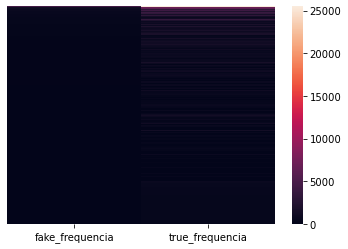

In [142]:
import seaborn as sns
sns.heatmap(dataframe, yticklabels=0)

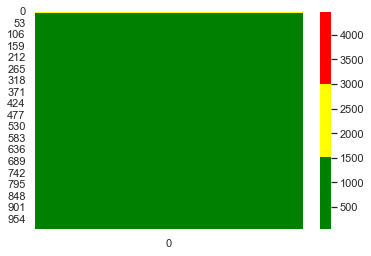

In [126]:
import numpy as np
import seaborn as sns
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
data = np.asarray(ser).reshape(1000,1)
sns.heatmap(data,cmap=ListedColormap(['green', 'yellow', 'red']))
plt.show()

<ipython-input-127-935f60510317>:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  sns.heatmap(ser[:, np.newaxis], cmap=ListedColormap(['green', 'yellow', 'red']))


<AxesSubplot:>

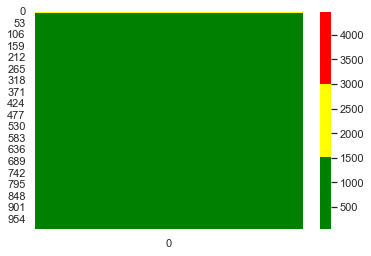

In [127]:
import seaborn as sns
import numpy as np
sns.heatmap(ser[:, np.newaxis], cmap=ListedColormap(['green', 'yellow', 'red']))